In [2]:
# google colab vers of jupyter notebook


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#google drive for colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfTrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

print(dfTrain)



                               md5hash  fitzpatrick_scale  \
0     fd06d13de341cc75ad679916c5d7e6a6                  4   
1     a4bb4e5206c4e89a303f470576fc5253                  1   
2     c94ce27e389f96bda998e7c3fa5c4a2e                  5   
3     ebcf2b50dd943c700d4e2b586fcd4425                  3   
4     c77d6c895f05fea73a8f3704307036c0                  1   
...                                ...                ...   
2855  aa4f94e33bbc118e2a95f7a8ad0344a1                  2   
2856  fb1feb5dbf0038eee9348a3740cef6f9                  1   
2857  811f74634ec6dd7022aa04e4968fea38                  1   
2858  9983c4ae2e5b505b746da35d068d00ec                  3   
2859  51592267156dc090a31782f26f09431d                  6   

      fitzpatrick_centaur                               label  \
0                       4                   prurigo-nodularis   
1                       1    basal-cell-carcinoma-morpheiform   
2                       5                              keloid   
3      

In [5]:
# df test
dfTest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

print(dfTest)

                               md5hash  fitzpatrick_scale  \
0     0844ae634f0e6e7ef1f73c2aeecbae0e                  2   
1     3b290d262098f761d719aa07cf36c040                  4   
2     cf561d08ac46d0fda678bff6621005ee                  2   
3     e6371069be05c6b0a95b4b3f1bacc9a5                  4   
4     f76cddb37265f97508f159078dcc7e7c                  5   
...                                ...                ...   
1222  270a217e6e961cf405a4ad46a110ff69                  1   
1223  176892dfc10eabf4ad8b1f50ec5df7e5                  5   
1224  91a4f52d7f99a33ec53d6d695e6c9f4d                  2   
1225  8ba5d48405d01accc3a218693a049ae9                  4   
1226  e3e180ecaeadef19fd487caab7655316                  2   

      fitzpatrick_centaur   qc  ddi_scale  
0                       2  NaN         12  
1                       3  NaN         34  
2                       3  NaN         12  
3                       3  NaN         34  
4                       5  NaN         56  
...

In [6]:
print(list(dfTrain.columns)) # train set has label, nine partition, threepartition label,
print(list(dfTest.columns))

['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'label', 'nine_partition_label', 'three_partition_label', 'qc', 'ddi_scale']
['md5hash', 'fitzpatrick_scale', 'fitzpatrick_centaur', 'qc', 'ddi_scale']


Notes for data for us to better understand it

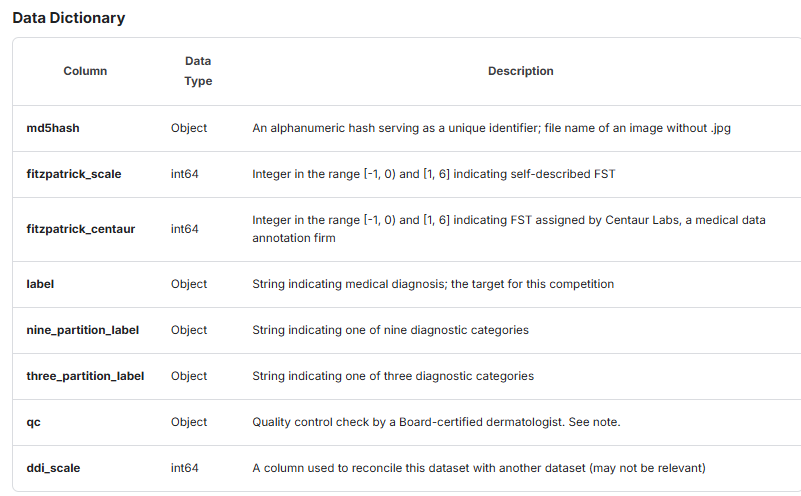

In [7]:
# visualize image data:
dfTest = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import keras
from keras import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout, Input
from keras.optimizers import Adam
from PIL import Image
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.preprocessing import image


# visualize images # TRIGGER WARNING THE PICS ARE KINDA GRAPHIC!!!!
train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/kaggle/input/bttai-ajl-2025/train/train",             # Path to the directory containing the dataset.
    validation_split=0.2,    # Specify that 20% of the dataset will be used for validation.
    subset="both",           # Create both training and validation datasets from the directory.
    seed=42,                 # Random seed to ensure reproducibility when shuffling the data.
    #image_size=image_size,   # Resize all images to the specified dimensions (180x180).
    batch_size=32,   # Divide the dataset into batches of the specified size (32 images per batch).
)

'''
# commented section that displays images due to graphic content
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
'''

In [10]:
dfTrain['ddi_scale']

,ddi_scale
0,34
1,12
2,56
3,34
4,12
...,...
2855,12
2856,12
2857,12
2858,34


In [11]:
dfTrain['qc']

,qc
0,NaN
1,NaN
2,1 Diagnostic
3,NaN
4,NaN
...,...
2855,NaN
2856,NaN
2857,NaN
2858,NaN


In [12]:
dfTrain = dfTrain.drop('ddi_scale', axis=1)
dfTrain = dfTrain.drop('qc', axis=1)

In [13]:
dfTrain.head()

# we remove the qc and ddi scale as they are not that important columns to making preditions later on


,md5hash,fitzpatrick_scale,fitzpatrick_centaur,label,nine_partition_label,three_partition_label
0,fd06d13de341cc75ad679916c5d7e6a6,4,4,prurigo-nodularis,benign-epidermal,benign
1,a4bb4e5206c4e89a303f470576fc5253,1,1,basal-cell-carcinoma-morpheiform,malignant-epidermal,malignant
2,c94ce27e389f96bda998e7c3fa5c4a2e,5,5,keloid,inflammatory,non-neoplastic
3,ebcf2b50dd943c700d4e2b586fcd4425,3,3,basal-cell-carcinoma,malignant-epidermal,malignant
4,c77d6c895f05fea73a8f3704307036c0,1,1,prurigo-nodularis,benign-epidermal,benign
